> [View this Notebook on Kaggle](https://www.kaggle.com/code/nabeelvalley/time-series-classification-with-sktime)

# Time Series Classification with SKTime

> [SKTime Docs](https://www.sktime.org/)

![SKTime Tasks](https://raw.githubusercontent.com/sktime/sktime-tutorial-pydata-global-2021/main/images/reduction-relations.png)

## Resources

- [Overview of time series analysis Python packages](https://siebert-julien.github.io/time-series-analysis-python/)
- [sktime - A Unified Toolbox for ML with Time Series - Markus Löning | PyData Global 2021](https://www.youtube.com/watch?v=ODspi8-uWgo)
- [GitHub SKTime Tutorial](https://github.com/sktime/sktime-tutorial-pydata-global-2021)

In [1]:
!pip install sktime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 36.0 MB/s eta 0:00:00


# Methodology

Using `sktime` for classification is similar to using it for forecasting wherein there are either predefined models or we can transform exising `sklearn` models to make them usable with time series data

## Importing Data

We can import the arrow head dataset and graph some of the entries

In [2]:
import pandas as pd

from sktime.datasets import load_arrow_head
from sktime.utils.plotting import plot_series
from sklearn.model_selection import train_test_split


In [3]:
X, y = load_arrow_head()

In [4]:
X.head()

,dim_0
0,0 -1.963009 1 -1.957825 2 -1.95614...
1,0 -1.774571 1 -1.774036 2 -1.77658...
2,0 -1.866021 1 -1.841991 2 -1.83502...
3,0 -2.073758 1 -2.073301 2 -2.04460...
4,0 -1.746255 1 -1.741263 2 -1.72274...


In [5]:
y[:5]

array(['0', '1', '2', '0', '1'], dtype='<U1')

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

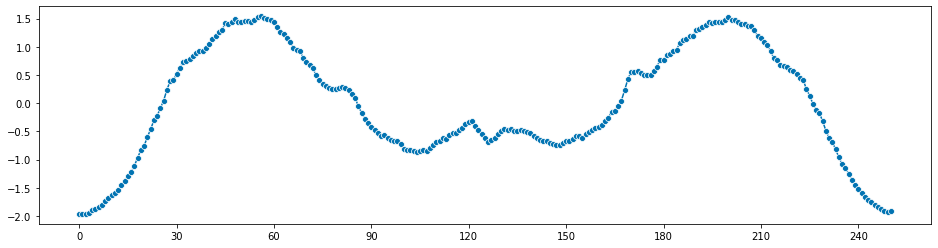

In [6]:
X_0 = list(X['dim_0'][0])
plot_series(pd.Series(X_0))

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

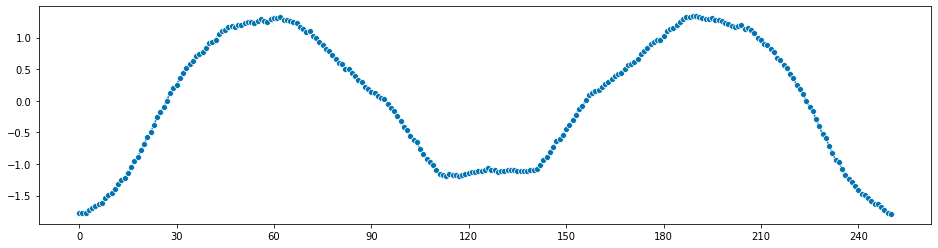

In [7]:
X_1 = list(X['dim_0'][1])
plot_series(pd.Series(X_1))

## Train/Test Split

Train/Test splitting can be cone using sklearn as normal since each row is a different series/observation

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Using a Classifier

`sktime` has built in classifiers that can be used as normal `sklearn` classifiers:

In [10]:
from sktime.classification.interval_based import TimeSeriesForestClassifier

In [11]:
classifier = TimeSeriesForestClassifier()
classifier.fit(X_train, y_train)

TimeSeriesForestClassifier()

And predictions can be made using the `predict` method:

In [12]:
y_pred = classifier.predict(X_test)

## Model Evaluation

We can also check the accuracy using normal `sklearn` metrics, for example `accuracy_score`

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9056603773584906

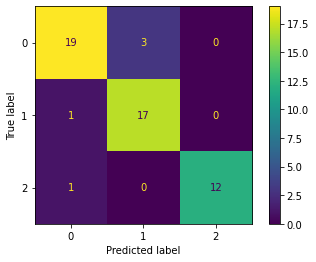

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(matrix)
disp.plot()

## Use with SKLearn Classifiers

`sktime` also allows the conversion of data such that it can be used with `sklearn` tabular classifiers. This is done by transforming the classifier using the `Tabularizer` in a sklearn pipeline

In [15]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import make_pipeline

from sktime.transformations.panel.reduce import Tabularizer

In [16]:
classifier = make_pipeline(Tabularizer(), GradientBoostingClassifier())
classifier.fit(X_train, y_train)

Pipeline(steps=[('tabularizer', Tabularizer()),
                ('gradientboostingclassifier', GradientBoostingClassifier())])

In [17]:
y_pred = classifier.predict(X_test)

In [18]:
accuracy_score(y_test, y_pred)

0.9056603773584906

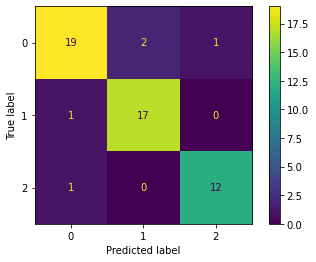

In [19]:
matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(matrix)
disp.plot()